# Load and Format Data

In [324]:
import pandas as pd
import numpy as np

# Load the numeric dataset
df = pd.read_csv('sample_data/Credit-Data.csv', header=0)

# TO-DO:
# Initialize array of column names
column_names = [
    'Status of existing checking account',
    'Duration of credit history',
    'Credit history',
    'Purpose',
    'Credit amount',
    'Savings account/bonds',
    'Present employment since',
    'Installment rate in percentage of disposable income',
    'Personal status and sex',
    'Other debtors or guarantors',
    'Present residence since',
    'Property',
    'Age in years',
    'Other installment plans',
    'Housing',
    'Number of existing credits at this bank',
    'Job',
    'Number of people being liable to provide maintenance for',
    'Telephone',
    'Foreign worker',
    'Credit risk'
]

df.columns = column_names # Assign new column names to data

# Separate features into categorical and numerical.
numerical_columns = [
    'Duration of credit history',
    'Credit amount',
    'Installment rate in percentage of disposable income',
    'Present residence since',
    'Age in years',
    'Number of existing credits at this bank',
    'Number of people being liable to provide maintenance for'
]

numerical_data = df[numerical_columns]
numerical_data.head() # Preview the numerical data.

,Duration of credit history,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2


# Data Preprocessing

In [325]:
# Scale the numerical data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Show a preview of the scaled data.
pd.DataFrame(data=scaled_data, columns=numerical_data.columns).head()

,Duration of credit history,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869


# Elbow Method

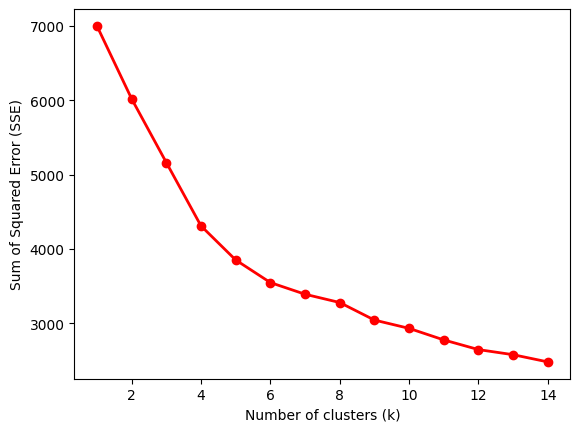

In [375]:
# Elbow method to determine ideal value(s) of k.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

lower_bound = 1
upper_bound = 15
SSE = []

K = range(lower_bound, upper_bound)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=30)
    kmeans.fit(scaled_data)
    SSE.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, SSE, color="red", linewidth=2, marker="o")
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

# Clustering

In [369]:
# Initialize models with different k-values.
firstModel_k = 5
secondModel_k = 8
firstModel = KMeans(firstModel_k, random_state=42)
secondModel = KMeans(secondModel_k, random_state=42)

In [370]:
# Apply K-means to find clusters using first model k-value.
df['Cluster'] = firstModel.fit(numerical_data)

# Create a DataFrame from the scaled data with numerical columns.
clustered_data_first = pd.DataFrame(data=scaled_data, columns=numerical_data.columns)

# Insert the cluster labels as the first column.
clustered_data_first.insert(loc=0, column="Cluster", value=firstModel.labels_)

# Display the resulting DataFrame with cluster labels.
clustered_data_first.head()

,Cluster,Duration of credit history,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
0,1,-1.24,-0.75,0.92,1.05,2.77,1.03,-0.43
1,2,2.25,0.95,-0.87,-0.77,-1.19,-0.70,-0.43
2,1,-0.74,-0.42,-0.87,0.14,1.18,-0.70,2.33
3,2,1.75,1.63,-0.87,1.05,0.83,-0.70,2.33
4,3,0.26,0.57,0.02,1.05,1.54,1.03,2.33


In [371]:
# Apply K-means to find clusters using second model k-value.
df['Cluster'] = secondModel.fit(numerical_data)

# Create a DataFrame from the scaled data with numerical columns.
clustered_data_second = pd.DataFrame(data=scaled_data, columns=numerical_data.columns)

# Insert the cluster labels as the first column.
clustered_data_second.insert(loc=0, column="Cluster", value=secondModel.labels_)

# Display the resulting DataFrame with cluster labels.
clustered_data_second.head()

,Cluster,Duration of credit history,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
0,4,-1.24,-0.75,0.92,1.05,2.77,1.03,-0.43
1,2,2.25,0.95,-0.87,-0.77,-1.19,-0.70,-0.43
2,1,-0.74,-0.42,-0.87,0.14,1.18,-0.70,2.33
3,6,1.75,1.63,-0.87,1.05,0.83,-0.70,2.33
4,2,0.26,0.57,0.02,1.05,1.54,1.03,2.33


# Metrics

In [372]:
# Performance analysis for different values of k using SSE.
SSE_data = {
    'Number of Clusters (k)': [firstModel_k, secondModel_k],
    'SSE': [firstModel.inertia_, secondModel.inertia_]
}

pd.options.display.float_format = '{:.2f}'.format # Format scientific notation

SSE_df = pd.DataFrame(SSE_data)
print(SSE_df.to_string(index=False))

 Number of Clusters (k)          SSE
                      5 478026760.74
                      8 193746553.40


In [373]:
# Performance analysis for different values of k using silhouette score.
from sklearn.metrics import silhouette_score

silhouette_data = {
    'Number of Clusters (k)': [firstModel_k, secondModel_k],
    'Silhouette Score': [silhouette_score(scaled_data, firstModel.labels_),
                         silhouette_score(scaled_data, secondModel.labels_)]
}

silhouette_df = pd.DataFrame(silhouette_data)

print(silhouette_df.to_string(index=False))

 Number of Clusters (k)  Silhouette Score
                      5              0.06
                      8              0.00


# Data Visualization

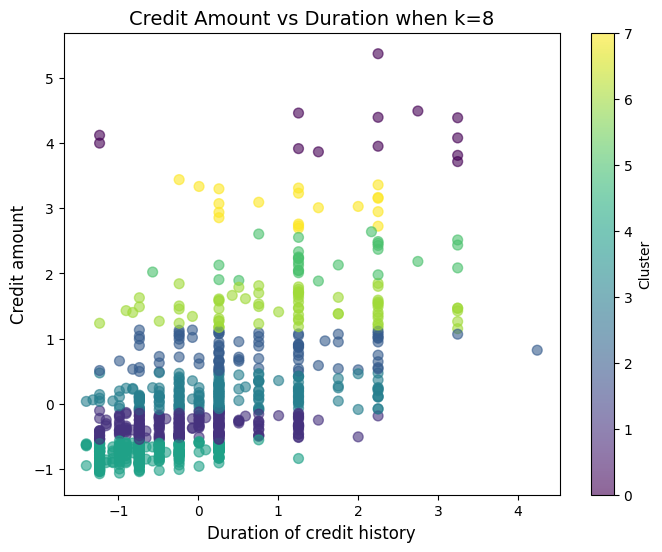

In [332]:
# Plot the clusters formed when k=9 using credit amount and duration.
plt.figure(figsize=(8, 6))
plt.scatter(clustered_data_second[numerical_columns[0]],
            clustered_data_second[numerical_columns[1]],
            c=clustered_data_second['Cluster'], cmap='viridis', s=50, alpha=0.6)

# Add title, labels, and color bar
plt.title(f'Credit Amount vs Duration when k={secondModel_k}', fontsize=14)
plt.xlabel(numerical_columns[0], fontsize=12)
plt.ylabel(numerical_columns[1], fontsize=12)
plt.colorbar(label='Cluster')

plt.show()

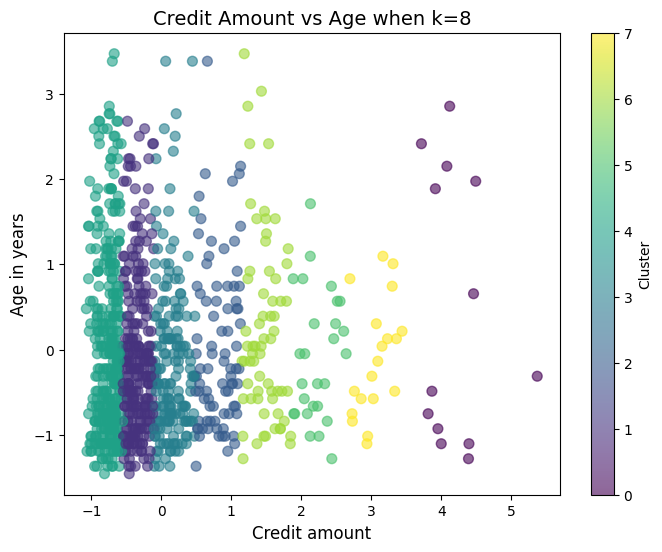

In [333]:
# Plot the clusters formed when k=9 using credit amount and age.
plt.figure(figsize=(8, 6))
plt.scatter(clustered_data_second[numerical_columns[1]],
            clustered_data_second[numerical_columns[4]],
            c=clustered_data_second['Cluster'], cmap='viridis', s=50, alpha=0.6)

plt.title(f'Credit Amount vs Age when k={secondModel_k}', fontsize=14)
plt.xlabel(numerical_columns[1], fontsize=12)
plt.ylabel(numerical_columns[4], fontsize=12)
plt.colorbar(label='Cluster')

plt.show()